In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import autokeras as ak
import json
import os
import time
from datetime import datetime
from matplotlib import pyplot
from sklearn.metrics import classification_report

In [2]:
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TensorFlow.")

import tensorflow as tf
print("\nTensorFlow version: ", tf.__version__)
print("\nIs GPU available?", tf.test.is_gpu_available())
print("\nNum GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print("\nPhysical Devices: ", tf.config.list_physical_devices('GPU'))

from tensorflow.python.client import device_lib
print("\nLocal devices:", device_lib.list_local_devices())

Please install GPU version of TensorFlow.

TensorFlow version:  2.8.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.

Is GPU available? False

Num GPUs Available:  0

Physical Devices:  []

Local devices: [name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17804881998463364778
xla_global_id: -1
]


In [3]:
SEED        = 10
folder_name = 'filtered_by_label'
limit_rows  = None
n_cpus      = os.cpu_count()

In [4]:
print(f"Execution started at {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}.")

Execution started at 2022-03-11 03:04:08.


In [5]:
def load_csv(subset,folder=folder_name):
    if limit_rows is None:
        full_filename = f'../../Data Preprocessing/{folder}/iot23_combined_{subset}.csv'
    else:
        full_filename = f'../../Data Preprocessing/{folder}/iot23_combined_{int(limit_rows/1000)}k_{subset}.csv'
    
    df = pd.read_table(filepath_or_buffer=full_filename, header=None, sep=',').infer_objects().to_numpy()
    
    return df.ravel() if df.shape[1] == 1 else df

In [6]:
X_train, X_test, y_train, y_test = load_csv('X_train'), load_csv('X_test'), load_csv('y_train'), load_csv('y_test')

print('X_train',X_train.shape,'\ny_train',y_train.shape)
print('X_test',X_test.shape,'\ny_test',y_test.shape)

X_train (7014497, 15) 
y_train (7014497,)
X_test (1753625, 15) 
y_test (1753625,)


In [7]:
clf = ak.StructuredDataClassifier(overwrite=True, max_trials=10, seed=SEED)

In [8]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, min_delta=1e-4)

print(f"Fitting started at {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}.")

clf.fit(X_train, y_train, batch_size=256, callbacks=[early_stopping], epochs=100, validation_split=0.25)

print(f"Fitting finished at {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}.")

Trial 10 Complete [01h 38m 28s]
val_accuracy: 0.9423704743385315

Best val_accuracy So Far: 0.9971530437469482
Total elapsed time: 05h 03m 33s
INFO:tensorflow:Oracle triggered exit
Epoch 1/100
27401/27401 [==============================] - 29s 1ms/step - loss: 8.2994 - accuracy: 0.6961
Epoch 2/100
27401/27401 [==============================] - 29s 1ms/step - loss: 0.5156 - accuracy: 0.8239
Epoch 3/100
27401/27401 [==============================] - 29s 1ms/step - loss: 0.4029 - accuracy: 0.9101
Epoch 4/100
27401/27401 [==============================] - 29s 1ms/step - loss: 0.3382 - accuracy: 0.9238
Epoch 5/100
27401/27401 [==============================] - 29s 1ms/step - loss: 0.2956 - accuracy: 0.9310
Epoch 6/100
27401/27401 [==============================] - 29s 1ms/step - loss: 0.2650 - accuracy: 0.9370
Epoch 7/100
27401/27401 [==============================] - 29s 1ms/step - loss: 0.2389 - accuracy: 0.9423
Epoch 8/100
27401/27401 [==============================] - 29s 1ms/step - los

27401/27401 [==============================] - 30s 1ms/step - loss: 0.0299 - accuracy: 0.9939
Epoch 76/100
27401/27401 [==============================] - 30s 1ms/step - loss: 0.0294 - accuracy: 0.9940
Epoch 77/100
27401/27401 [==============================] - 30s 1ms/step - loss: 0.0298 - accuracy: 0.9940
Epoch 78/100
27401/27401 [==============================] - 30s 1ms/step - loss: 0.0300 - accuracy: 0.9941
Epoch 79/100
27401/27401 [==============================] - 30s 1ms/step - loss: 0.0300 - accuracy: 0.9940
Epoch 80/100
27401/27401 [==============================] - 30s 1ms/step - loss: 0.0308 - accuracy: 0.9939
Epoch 81/100
27401/27401 [==============================] - 30s 1ms/step - loss: 0.0283 - accuracy: 0.9943
Epoch 82/100
27401/27401 [==============================] - 30s 1ms/step - loss: 0.0295 - accuracy: 0.9942
Epoch 83/100
27401/27401 [==============================] - 30s 1ms/step - loss: 0.0287 - accuracy: 0.9941
Epoch 84/100
27401/27401 [========================

In [19]:
output_filename = 'model-autokeras-sdc-filtered_by_label'
class_names = ['Benign','DDoS','Okiru','PartOfAHorizontalPortScan']

In [20]:
print(f"Evaluation started at {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}.")

print(f'\n**** AutoKeras evaluation ****')
print(clf.evaluate(X_test, y_test, batch_size=256))

print(f'\n**** Scikit-learn evaluation ****')
y_pred = [int(x) for x in clf.predict(X_test, batch_size=256)]
print(classification_report(y_test, y_pred, digits=4, target_names=class_names, zero_division=0))
with open(f'{output_filename}_report.json', 'w') as fp:
    json.dump(classification_report(y_test, y_pred, output_dict=True, target_names=class_names, zero_division=0), fp)

print(f"Evaluation finished at {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}.")

Evaluation started at 2022-03-11 10:23:20.

**** AutoKeras evaluation ****
6851/6851 [==============================] - 6s 825us/step - loss: 0.0158 - accuracy: 0.9967
[0.01575186848640442, 0.9967387318611145]

**** Scikit-learn evaluation ****
6851/6851 [==============================] - 8s 1ms/step
                           precision    recall  f1-score   support

                   Benign     0.9975    0.9962    0.9969    852507
                     DDoS     0.9998    0.9994    0.9996    433190
                    Okiru     0.9113    0.9314    0.9212      2988
PartOfAHorizontalPortScan     0.9931    0.9956    0.9944    464940

                 accuracy                         0.9967   1753625
                macro avg     0.9754    0.9807    0.9780   1753625
             weighted avg     0.9967    0.9967    0.9967   1753625

Evaluation finished at 2022-03-11 10:23:45.


In [21]:
best_model = clf.export_model()

In [22]:
best_model.metrics_names

['loss', 'accuracy']

In [23]:
best_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 15)]              0         
                                                                 
 multi_category_encoding (Mu  (None, 15)               0         
 ltiCategoryEncoding)                                            
                                                                 
 dense (Dense)               (None, 16)                256       
                                                                 
 re_lu (ReLU)                (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                1088      
                                                                 
 re_lu_1 (ReLU)              (None, 64)                0         
                                                             

In [24]:
with open(f'{output_filename}_model.json', 'w') as fp:
    json.dump(best_model.to_json(), fp)

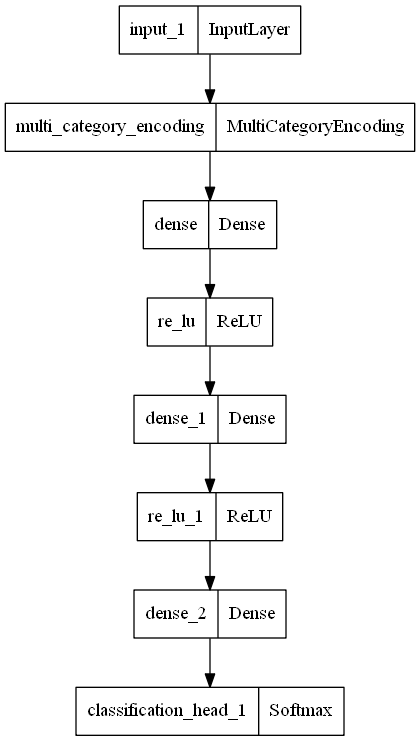

In [25]:
tf.keras.utils.plot_model(best_model, to_file=f'{output_filename}.png')

In [26]:
best_model.save(f'{output_filename}')

INFO:tensorflow:Assets written to: model-autokeras-sdc-filtered_by_label\assets


In [27]:
print(f"Execution finished at {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}.")

Execution finished at 2022-03-11 10:23:49.
